In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch, torchvision
from torch.utils.data import Dataset
from dataset import defectDataset_df, split_and_sample, create_circular_mask
import torch.nn as nn
import torch.optim as optim
from PIL import Image
# from torch.optim import lr_sheduler
from torch.autograd import Variable
from torchvision import transforms
# from grayscale_resnet import resnet34

In [2]:
def add_circular_mask(image):
    w, h = image.size[0], image.size[1]
    mask = create_circular_mask(w, h)
    img_masked = image * mask
    img_masked = Image.fromarray(img_masked.astype('uint8'), 'L')
    return img_masked

In [7]:
data_transform = transforms.Compose([
        transforms.RandomPerspective(distortion_scale=0.3, p=0.5, interpolation=3),
        transforms.RandomRotation((-90,90)),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomResizedCrop(200, scale=(0.8, 1), ratio=(1, 1)),
        # apply circular mask
        transforms.Lambda(lambda x: add_circular_mask(x)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.3019],
                             std=[0.1909])
    ])

old_data_transform = transforms.Compose([
        transforms.RandomResizedCrop(200, scale=(1, 1), ratio=(1, 1)),
        transforms.RandomRotation((-90,90)),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.3019],
                             std=[0.1909])
    ])

In [8]:
# trainset loader
np.random.seed(100)

method = 'uniform'
non_pos_ratio = 4
window_size = 45

my_df = split_and_sample(method = method,n_samples = 1995, non_pos_ratio = non_pos_ratio)

trainset = defectDataset_df(df = my_df, window_size = window_size, transforms=data_transform)
old_trainset = defectDataset_df(df = my_df, window_size = window_size, transforms=old_data_transform, old_transform=True)

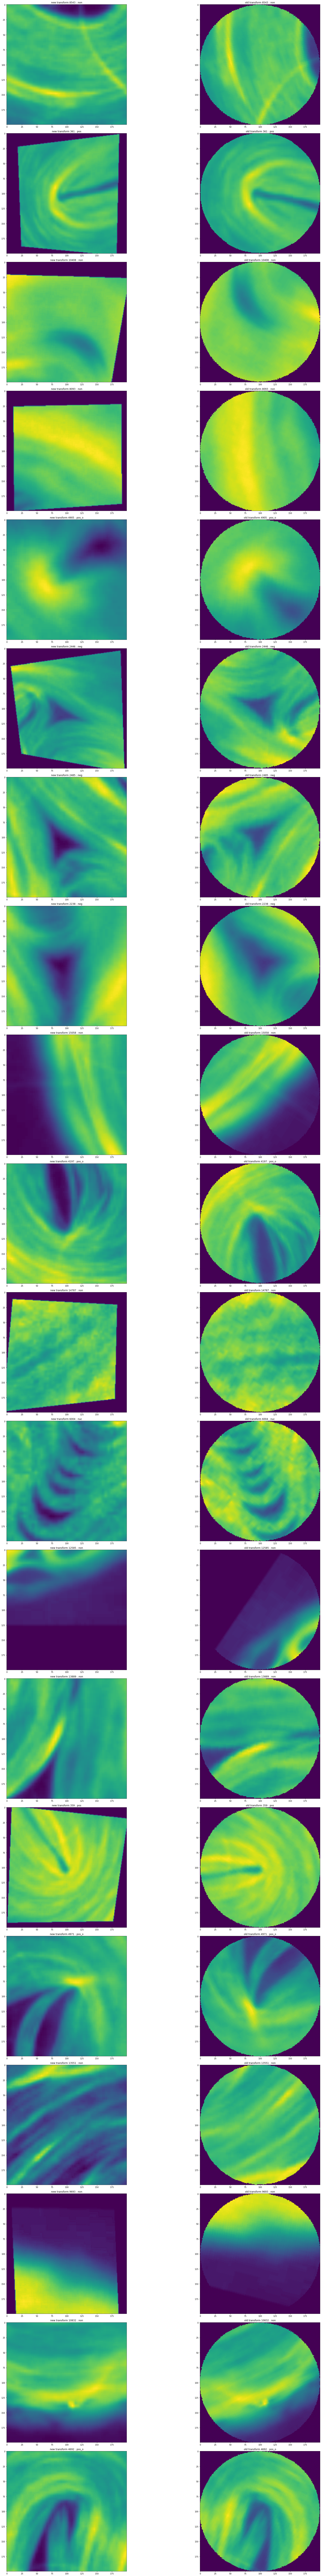

In [9]:
# visualize trainset data
classes = ['pos', 'neg', 'pos_o', 'nuc', 'non']
indices = np.random.randint(0, len(trainset), 20)
fig = plt.figure(figsize=(30, 180))
for i in range(20):
    index = indices[i]
    new_image = trainset[index]
    old_image = old_trainset[index]
    ax = plt.subplot(20, 2, 2 * i + 1)
    plt.tight_layout()
    ax.set_title('new transform ' + str(index) + ' : ' + str(classes[new_image[1]]))
    plt.imshow(new_image[0].squeeze())
    
    ax = plt.subplot(20, 2, 2 * i + 2)
    plt.tight_layout()
    ax.set_title('old transform ' + str(index) + ' : ' + str(classes[old_image[1]]))
    plt.imshow(old_image[0].squeeze())

In [6]:
# fig = plt.figure(figsize=(18, 16))
# for i in range(9):
#     index = indices[i]
#     image = old_trainset[index]
#     print(image[0].shape)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.tight_layout()
#     ax.set_title(str(index) + ' : ' + str(classes[image[1]]))
#     plt.imshow(image[0].squeeze())